In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("/content/beatlesfull.csv")

In [3]:
df["sub"]=df['subreddit'].apply(lambda x : 0 if x=="beatlescirclejerk" else (1 if x=="TheBeatles" else 2))

In [4]:
X=df["all_words"]
y=df['sub']

In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
def lemmatizer(sentence):
  doc = nlp(sentence)
  # for word in doc:
  #   if word.is_alpha:

  return [word.lemma_ for word in doc if word.is_alpha]


#count vectorizer
cvect = CountVectorizer(tokenizer = lemmatizer, max_features = 500)

#transform
# cvect.fit_transform(X_test)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)


In [17]:
model_dic={}

In [42]:
def run_model(pipe, model_name):
  nlppipe=pipe
  nlppipe.fit(X_train,y_train)
  train_score=nlppipe.score(X_train,y_train)
  test_score=nlppipe.score(X_test,y_test)

  print(f"{pipe} \n\nscore on train data: {train_score}")

  print(f"\n\nscore on test data: {test_score}")
  try:
    coefs = nlppipe.named_steps['clf'].coef_

    words = nlppipe.named_steps['cvect'].get_feature_names_out()

    df = pd.DataFrame({'coefs': coefs[0], 'words': words})

    df.nlargest(10, 'coefs').plot(kind='barh', x='words', y='coefs')
  except:
      print("no dice, or coef_")
  y_pred=pipe.predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  f1_scoret=f1_score(y_pred,y_test, average="weighted")
  model_dic[model_name] = {'model': model_name, 'train_score': train_score, 'test_score': test_score, "f1_score": f1_scoret}

#put them in dataframe with words"




  return

TF-IDF with Logistic Regression

In [43]:
pipetf_lr = Pipeline(
    steps=[
        ('cvect', TfidfVectorizer(max_features=3000)),
        ('clf', LogisticRegression())
    ]
)

Pipeline(steps=[('cvect', TfidfVectorizer(max_features=3000)),
                ('clf', LogisticRegression())]) 

score on train data: 0.9128888888888889


score on test data: 0.6
[[98 17  9]
 [ 5 68 57]
 [18 44 59]]


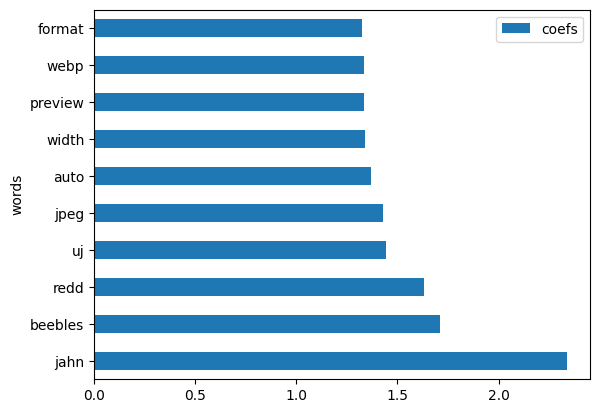

In [44]:
run_model(pipetf_lr, "LogRegression")

In [45]:
pipetf_rf = Pipeline(
    steps=[
        ('cvect', TfidfVectorizer(max_features=3000)),
        ('clf', RandomForestClassifier(n_estimators=1000))
    ]
)

In [46]:
run_model(pipetf_rf, "randomforest")

Pipeline(steps=[('cvect', TfidfVectorizer(max_features=3000)),
                ('clf', RandomForestClassifier(n_estimators=1000))]) 

score on train data: 0.9991111111111111


score on test data: 0.5893333333333334
no dice, or coef_
[[93 25  6]
 [ 8 71 51]
 [19 45 57]]


In [47]:
pipetf_kn = Pipeline(
    steps=[
        ('cvect', TfidfVectorizer(max_features=3000)),
        ('clf', KNeighborsClassifier(n_neighbors=9))
    ]
)

In [48]:
run_model(pipetf_kn,"knn_class")

Pipeline(steps=[('cvect', TfidfVectorizer(max_features=3000)),
                ('clf', KNeighborsClassifier(n_neighbors=9))]) 

score on train data: 0.7173333333333334


score on test data: 0.584
no dice, or coef_
[[91 17 16]
 [ 7 55 68]
 [15 33 73]]


In [49]:
pipetf_svc = Pipeline(
    steps=[
        ('cvect', TfidfVectorizer(max_features=3000)),
        ('clf', SVC())
    ]
)

In [50]:
run_model(pipetf_svc, "svc")

Pipeline(steps=[('cvect', TfidfVectorizer(max_features=3000)), ('clf', SVC())]) 

score on train data: 0.9875555555555555


score on test data: 0.5946666666666667
no dice, or coef_
[[92 22 10]
 [ 4 72 54]
 [17 45 59]]


In [51]:
pd.DataFrame.from_dict(model_dic)

,LogRegression,randomforest,knn_class,svc
model,LogRegression,randomforest,knn_class,svc
train_score,0.912889,0.999111,0.717333,0.987556
test_score,0.6,0.589333,0.584,0.594667
f1_score,0.598658,0.588425,0.582343,0.590993
